<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#AB-Testing" data-toc-modified-id="AB-Testing-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>AB-Testing</a></span></li></ul></div>

# AB-Testing

![cats](images/cats.jpeg)


Imaginad que somos los cientificos de datos de la empresa de videojuegos Tactile Entertainment. Los desarrolladores del juego Cookie Cats pretenden introducir un cambio en el juego para aumentar la retencion de los jugadores. En cierto nivel del juego los jugadores se encuentran una puerta que les obliga a esperar o a pagar la app. Actualmente la puerta se encuentra en nivel 30 y se pretende pasar al nivel 40, para comprobar la retencion a 1 y 7 dias. Antes de realizar el cambio definitivo en el juego se raliza un test AB.

Los datos estan alojados en `data/cookie_cats.csv`. Nuestro grupo de control sera la version actual `gate_30` y el grupo de tratamiento sera la version `gate_40`. Debemos realizar el test para 1 dia de retencion `retention_1` y para 7 dias `retention_7`.

In [1]:
# librerias

import pandas as pd
import numpy as np

from statsmodels.stats.proportion import proportions_ztest, proportion_confint
from scipy.stats import norm, sem

import pylab as plt

from bayes import *

In [2]:
# datos
cat = pd.read_csv('data/cookie_cats.csv')
cat.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


In [3]:
def bayes(priori, verosimilitud):
    
    marginal = sum(np.multiply(priori, verosimilitud)) # cte normalizacion
    
    posteriori = np.divide(np.multiply(priori, verosimilitud), marginal)
    
    return posteriori

In [4]:
cross = pd.crosstab(cat.version == 'gate_30', cat.retention_7 == 'gate_40')
cross2 = pd.crosstab(cat['version'], cat['retention_7'])

In [5]:
vis_30, com_30 = 36198 + 8502, 8502
vis_40, com_40 = 37210 + 8279, 8279

cr_30 = com_30/vis_30
cr_40 = com_40/vis_40

print('Tasas', cr_30, cr_40)

Tasas 0.19020134228187918 0.18200004396667327


In [6]:
#Apriori

a_30, b_30 = com_30 + 1, vis_30 - com_30 + 1
a_40, b_40 = com_40 + 1, vis_40 - com_40 + 1

# Betas

beta_30 = beta(a_30, b_30)
beta_40 = beta(a_40, b_40)

In [7]:
salto = ((beta_40.mean() - beta_30.mean()) / beta_30.mean())
salto

-0.04311526114658881

In [8]:
prob = calc_prob(beta_30, beta_40)
prob

0.9992226613235504

In [9]:
print (
'''El test disminuye la tasa de conversion en un {:2.2f}%,
con una probabilidad del {:2.2f}%'''
    .format(salto * 100, prob * 100)
)

El test disminuye la tasa de conversion en un -4.31%,
con una probabilidad del 99.92%


0.19020134228187918 0.18200004396667327


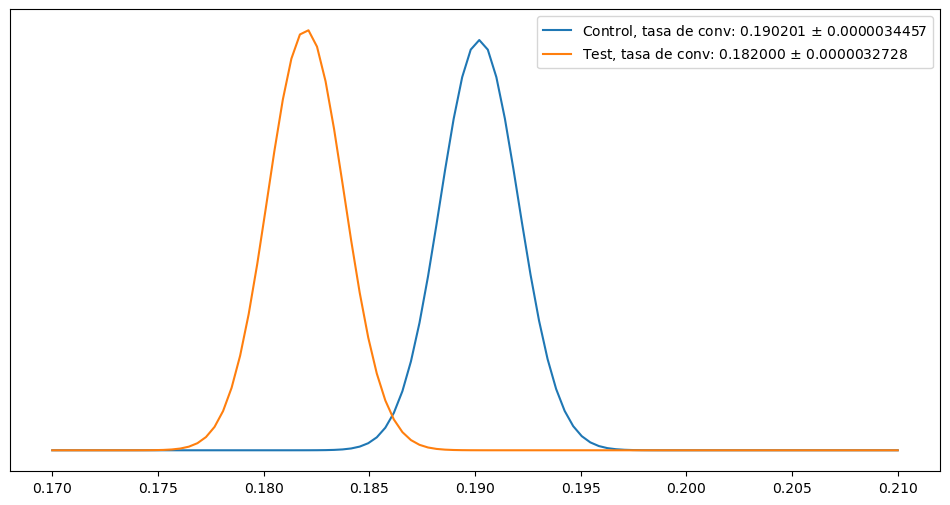

In [10]:
print(cr_30, cr_40)
plt.figure(figsize = (12,6))
plot([beta_30, beta_40], ['Control', 'Test'], lsup = 0.17, linf = 0.21)

In [11]:
#CONCLUSIONES

#Hemos comprobado con un 99.92$ de probabilidad que el test disminuye la tasa de conversión lo que quiere decir que es mejor tener la puerta en la 30